In [1]:
# imports
import numpy as np
import csv
import pandas as pd

#### Aircraft Facilities

In [2]:
facilities = pd.read_csv('aircraft-facilities.csv', sep= ',', header= None)

# a summary of the facilities file
facilities.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,29,32,33,35,37,49,50,51,56,65,66,75,76,81,82,83,84,85,86,87,88,89,90,91,92,93,104,105,106,107) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,geometry,objectid,sitenumber,type,locationid,effectived,region,districtof,state,statename,...,airporte_1,contractfu,transients,otherservi,windindica,icaoidenti,longitude,latitude_d,enplanemen,passengers
1,POINT (-105.161729395 40.1124574763),3001,02695.351*H,HELIPORT,85CO,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,Y-L,NaN,-105.161652,40.112484,0,0
2,POINT (-108.283929396 38.0999574774),3002,02695.41*H,HELIPORT,CD55,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,NaN,NaN,-108.283913,38.099998,0,0
3,POINT (-108.184029397 38.2999574768),3003,02695.42*H,HELIPORT,CD54,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,NaN,NaN,-108.183968,38.299988,0,0
4,POINT (-108.340429395 38.1624574774),3004,02695.5*A,AIRPORT,1CO2,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,Y,NaN,-108.340363,38.162491,0,0


In [3]:
new_header = facilities.iloc[0] 
facilities = facilities[1:]
facilities.columns = new_header 
facilities.head()

,geometry,objectid,sitenumber,type,locationid,effectived,region,districtof,state,statename,...,airporte_1,contractfu,transients,otherservi,windindica,icaoidenti,longitude,latitude_d,enplanemen,passengers
1,POINT (-105.161729395 40.1124574763),3001,02695.351*H,HELIPORT,85CO,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,Y-L,NaN,-105.161652,40.112484,0,0
2,POINT (-108.283929396 38.0999574774),3002,02695.41*H,HELIPORT,CD55,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,NaN,NaN,-108.283913,38.099998,0,0
3,POINT (-108.184029397 38.2999574768),3003,02695.42*H,HELIPORT,CD54,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,NaN,NaN,-108.183968,38.299988,0,0
4,POINT (-108.340429395 38.1624574774),3004,02695.5*A,AIRPORT,1CO2,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,Y,NaN,-108.340363,38.162491,0,0
5,POINT (-108.213129398 38.2193574758),3005,02695.51*A,AIRPORT,0CO6,2017-06-22T00:00:00.000Z,ANM,DEN,CO,COLORADO,...,NaN,NaN,NaN,NaN,Y,NaN,-108.213135,38.219433,0,0


In [4]:
facilities.shape

(19765, 108)

In [5]:
facilities.describe(include = 'all')

,geometry,objectid,sitenumber,type,locationid,effectived,region,districtof,state,statename,...,airporte_1,contractfu,transients,otherservi,windindica,icaoidenti,longitude,latitude_d,enplanemen,passengers
count,19765,19765,19765,19765,19765,19765,19619,19765,19619,19619,...,7606,18,4929,3375,16303,2677,19765.000000,19765.000000,19765,19765
unique,19742,19765,19765,6,19765,1,9,24,58,58,...,3954,2,6,417,3,2677,19646.000000,19644.000000,754,765
top,POINT (-111.921929396 33.6252574772),380,20898.*A,AIRPORT,NC66,2017-06-22T00:00:00.000Z,AGL,NONE,TX,TEXAS,...,2012-02-09T00:00:00.000Z,N,TIE,AGRI,Y,KOFP,-75.016281,39.966778,0,0
freq,3,1,1,13299,1,19765,3933,3498,2031,2031,...,12,15,2464,452,10409,1,3.000000,3.000000,11235,11229


In [6]:
facilities["type"] =  facilities["type"].astype('category')

In [7]:
facilities["type"].value_counts()

AIRPORT          13299
HELIPORT          5801
SEAPLANE BASE      503
ULTRALIGHT         113
GLIDERPORT          36
BALLOONPORT         13
Name: type, dtype: int64

In [8]:
facilities["statename"].value_counts()

TEXAS                2031
CALIFORNIA            879
FLORIDA               871
PENNSYLVANIA          767
ALASKA                753
ILLINOIS              731
OHIO                  681
NEW YORK              573
INDIANA               568
WISCONSIN             551
WASHINGTON            541
MISSOURI              502
LOUISIANA             491
MICHIGAN              478
NORTH CAROLINA        477
MINNESOTA             475
GEORGIA               454
COLORADO              446
VIRGINIA              426
OREGON                422
OKLAHOMA              406
KANSAS                368
TENNESSEE             331
NEW JERSEY            321
ARIZONA               304
ALABAMA               303
ARKANSAS              295
IDAHO                 294
MONTANA               289
IOWA                  276
NORTH DAKOTA          275
KENTUCKY              266
NEBRASKA              239
MISSISSIPPI           238
MASSACHUSETTS         227
MARYLAND              221
SOUTH CAROLINA        197
MAINE                 193
NEW HAMPSHIR

In [9]:
facilities["ownership"].value_counts()

PR    14426
PU     5027
MR      140
MA       96
MN       70
CG        6
Name: ownership, dtype: int64

In [10]:
facilities["owner"].value_counts()

ALASKA DOT&PF NORTHERN REGION      102
ALASKA DOT&PF CENTRAL REGION        70
ALASKA DOT&PF SOUTHCOAST REGION     62
CENTURYLINK                         50
USAF                                50
                                  ... 
NORTHERN TRAILS AVIATION             1
LAKE CHARLES MEMORIAL HOSP.          1
OREGON HEALTH SCIENCES UNIV          1
AIR EVAC EMS INC                     1
JOE KEMP                             1
Name: owner, Length: 17716, dtype: int64

In [11]:
facilities["use"].value_counts()

PR    14518
PU     5247
Name: use, dtype: int64

In [12]:
facilities = facilities[facilities['use'] != 'PR']

In [13]:
facilities["use"].value_counts()

PU    5247
Name: use, dtype: int64

In [14]:
facilities["statename"].value_counts()

ALASKA               396
TEXAS                391
CALIFORNIA           249
MICHIGAN             229
OHIO                 162
MINNESOTA            151
OKLAHOMA             137
KANSAS               137
WASHINGTON           137
NEW YORK             136
FLORIDA              130
MONTANA              129
PENNSYLVANIA         129
WISCONSIN            129
MISSOURI             127
IDAHO                123
IOWA                 118
INDIANA              118
NORTH CAROLINA       113
ILLINOIS             109
GEORGIA              107
ARKANSAS             100
OREGON                98
ALABAMA               90
NORTH DAKOTA          89
NEBRASKA              83
MISSISSIPPI           81
ARIZONA               80
TENNESSEE             79
COLORADO              74
LOUISIANA             73
SOUTH DAKOTA          72
MAINE                 70
SOUTH CAROLINA        66
VIRGINIA              65
NEW MEXICO            63
KENTUCKY              59
NEVADA                50
UTAH                  45
NEW JERSEY            43


In [15]:
facilities["owner"].value_counts()

ALASKA DOT&PF NORTHERN REGION      102
ALASKA DOT&PF CENTRAL REGION        70
ALASKA DOT&PF SOUTHCOAST REGION     62
PUBLIC DOMAIN                       25
U S FOREST SERVICE                  16
                                  ... 
GREGORY G. DART                      1
LYNDA MAE WARF                       1
H.E. REYNOLDS                        1
ZANNON FAMILY FOUNDATION             1
MARK POLLACK                         1
Name: owner, Length: 4278, dtype: int64

In [16]:
facilities.shape

(5247, 108)

In [17]:
facilities["type"].value_counts()

AIRPORT          4964
SEAPLANE BASE     213
HELIPORT           61
GLIDERPORT          5
ULTRALIGHT          3
BALLOONPORT         1
Name: type, dtype: int64

In [18]:
facilities["trafficpat"].value_counts()

0       2478
0       1726
1000     239
1000     201
800      193
        ... 
780        1
1800       1
775        1
771        1
653        1
Name: trafficpat, Length: 198, dtype: int64

In [19]:
del facilities['statename']
del facilities['countystat']
del facilities['geometry']
del facilities['owneraddre']
del facilities['ownercsz']
del facilities['ownerphone']
del facilities['manageradd']
del facilities['managercsz']
del facilities['managerpho']
del facilities['arplatitud']
del facilities['arplatit_1']
del facilities['arplongitu']
del facilities['arplongi_1']
del facilities['arpelevati']
del facilities['arpeleva_1']
del facilities['magneticva']
del facilities['magnetic_1']
del facilities['fueltypes']
del facilities['powerplant']
del facilities['bottledoxy']
del facilities['effectived']
del facilities['contractfu']
del facilities['transients']
del facilities['otherservi']
del facilities['windindica']
del facilities['airporte_1']
del facilities['county']
del facilities['sitenumber']
del facilities['region']
del facilities['districtof']
del facilities['airportpos']
del facilities['airportp_1']
del facilities['airportele']
del facilities['owner']
del facilities['manager']
del facilities['arpmethod']
del facilities['city']
del facilities['objectid']
del facilities['distancefr']
del facilities['chartname']
del facilities['directionf']
del facilities['landareaco']
del facilities['boundaryar']
del facilities['boundary_1']
del facilities['responsibl']
del facilities['responsi_1']
del facilities['boundary_2']
del facilities['responsi_2']
del facilities['tieinfss']
del facilities['tieinfssid']
del facilities['tieinfssna']
del facilities['airporttof']
del facilities['tieinfssto']
del facilities['alternatef']
del facilities['alternat_1']
del facilities['alternat_2']
del facilities['notamfacil']
del facilities['notamservi']
del facilities['activation']
del facilities['airportsta']
del facilities['certificat']
del facilities['federalagr']
del facilities['airspacede']
del facilities['customsair']
del facilities['customslan']
del facilities['militaryjo']
del facilities['militaryla']
del facilities['inspection']
del facilities['inspecti_1']
del facilities['lastinspec']
del facilities['lastowneri']
del facilities['airframere']
del facilities['bulkoxygen']
del facilities['lightingsc']
del facilities['beaconsche']
del facilities['atct']
del facilities['unicomfreq']
del facilities['ctaffreque']
del facilities['segmentedc']
del facilities['beaconcolo']
del facilities['noncommerc']
del facilities['medicaluse']

In [20]:
facilities.head()

,type,locationid,state,facilityna,ownership,use,trafficpat,singleengi,multiengin,jetengineg,...,operatio_2,operatio_3,operatio_4,operatio_5,operatio_6,icaoidenti,longitude,latitude_d,enplanemen,passengers
6,AIRPORT,AIB,CO,HOPKINS FIELD,PU,PU,0,11,0,0,...,0,1600,2400,90,2015-01-01T00:00:00.000Z,KAIB,-108.563278,38.23875,0,0
16,AIRPORT,PSO,CO,STEVENS FIELD,PU,PU,1000,36,4,0,...,200,6000,9900,750,2014-12-31T00:00:00.000Z,KPSO,-107.056,37.286251,0,0
18,AIRPORT,7V2,CO,NORTH FORK VALLEY,PU,PU,800,17,3,0,...,0,1000,1000,0,2014-12-31T00:00:00.000Z,NaN,-107.645859,38.831306,0,0
44,AIRPORT,4V0,CO,RANGELY,PU,PU,0,15,1,0,...,100,42000,5000,15,2016-11-22T00:00:00.000Z,NaN,-108.763054,40.093971,0,0
58,AIRPORT,04V,CO,SAGUACHE MUNI,PU,PU,0,0,0,0,...,0,0,100,0,2014-12-31T00:00:00.000Z,NaN,-106.174324,38.099396,0,0


In [21]:
facilities.shape

(5247, 26)

#### Airport Traffic

In [22]:
traffic = pd.read_csv('airport-traffic.csv', sep= ',', header= None)

# a summary of the airport traffic file
traffic.head()

,0,1,2,3,4,5,6,7,8,9,10
0,aggregationmethod,date,version,airportname,percentofbaseline,centroid,city,state,iso_3166_2,country,geography
1,Daily,2020-03-31,1,Boston Logan International,71,POINT (-71.0102909977 42.3636330377),Boston,Massachusetts,US-MA,United States of America (the),"POLYGON ((-71.005089283 42.3472534333, -71.003..."
2,Daily,2020-03-31,1,Calgary International,91,POINT (-114.013122872 51.1184753728),Calgary,Alberta,CA-AB,Canada,"POLYGON ((-113.981866837 51.1392131914, -113.9..."
3,Daily,2020-03-31,1,Charlotte Douglas International,81,POINT (-80.9478114283 35.2136892261),Charlotte,North Carolina,US-NC,United States of America (the),"POLYGON ((-80.9332966805 35.2337368341, -80.94..."
4,Daily,2020-03-31,1,Chicago OHare International,77,POINT (-87.910595204 41.9804600429),Chicago,Illinois,US-IL,United States of America (the),"POLYGON ((-87.9397845268 41.9608463705, -87.93..."


In [23]:
new_header = traffic.iloc[0] 
traffic = traffic[1:]
traffic.columns = new_header 
traffic.head()

,aggregationmethod,date,version,airportname,percentofbaseline,centroid,city,state,iso_3166_2,country,geography
1,Daily,2020-03-31,1,Boston Logan International,71,POINT (-71.0102909977 42.3636330377),Boston,Massachusetts,US-MA,United States of America (the),"POLYGON ((-71.005089283 42.3472534333, -71.003..."
2,Daily,2020-03-31,1,Calgary International,91,POINT (-114.013122872 51.1184753728),Calgary,Alberta,CA-AB,Canada,"POLYGON ((-113.981866837 51.1392131914, -113.9..."
3,Daily,2020-03-31,1,Charlotte Douglas International,81,POINT (-80.9478114283 35.2136892261),Charlotte,North Carolina,US-NC,United States of America (the),"POLYGON ((-80.9332966805 35.2337368341, -80.94..."
4,Daily,2020-03-31,1,Chicago OHare International,77,POINT (-87.910595204 41.9804600429),Chicago,Illinois,US-IL,United States of America (the),"POLYGON ((-87.9397845268 41.9608463705, -87.93..."
5,Daily,2020-03-31,1,Dallas/Fort Worth International,68,POINT (-97.0394983969 32.8940590356),Grapevine,Texas,US-TX,United States of America (the),"POLYGON ((-97.0429444313 32.9265900261, -97.04..."


In [24]:
traffic.shape

(50, 11)

In [25]:
traffic.describe(include = 'all')

,aggregationmethod,date,version,airportname,percentofbaseline,centroid,city,state,iso_3166_2,country,geography
count,50,50,50,50,50,50,50,50,50,50,50
unique,1,2,1,26,33,26,25,21,21,2,26
top,Daily,2020-03-31,1,Detroit Metropolitan Wayne County,46,POINT (-74.0483797793 45.6815027038),New York,New York,US-CA,United States of America (the),"POLYGON ((-80.9332966805 35.2337368341, -80.94..."
freq,50,26,50,2,3,2,4,4,4,33,2


In [26]:
traffic["airportname"].value_counts()

Detroit Metropolitan Wayne County           2
Seattle-Tacoma International                2
Charlotte Douglas International             2
Miami International                         2
Vancouver International                     2
Newark Liberty International                2
LaGuardia                                   2
Chicago OHare International                 2
Daniel K. Inouye International              2
John F. Kennedy International               2
Hamilton International                      2
Edmonton International                      2
Denver International                        2
Montreal Trudeau                            2
Boston Logan International                  2
Halifax International                       2
McCarran International                      2
Montreal Mirabel                            2
Hartsfield-Jackson Atlanta International    2
Calgary International                       2
Toronto Pearson                             2
Dallas/Fort Worth International   

In [27]:
traffic["date"].value_counts()

2020-03-31    26
2020-03-30    24
Name: date, dtype: int64

In [28]:
traffic.sort_values(by=['percentofbaseline'], inplace=True, ascending=False)
traffic.head()

,aggregationmethod,date,version,airportname,percentofbaseline,centroid,city,state,iso_3166_2,country,geography
26,Daily,2020-03-31,1,Winnipeg International,98,POINT (-97.2190621862 49.9024712566),Winnipeg,Manitoba,CA-MB,Canada,"POLYGON ((-97.2094345093 49.8979517851, -97.20..."
37,Daily,2020-03-30,1,Hamilton International,98,POINT (-79.9266930702 43.1720360845),Hamilton,Ontario,CA-ON,Canada,"POLYGON ((-79.9327468872 43.1551600162, -79.93..."
6,Daily,2020-03-31,1,Daniel K. Inouye International,92,POINT (-157.918285205 21.3259652489),Urban Honolulu,Hawaii,US-HI,United States of America (the),"POLYGON ((-157.926621437 21.3389395548, -157.9..."
2,Daily,2020-03-31,1,Calgary International,91,POINT (-114.013122872 51.1184753728),Calgary,Alberta,CA-AB,Canada,"POLYGON ((-113.981866837 51.1392131914, -113.9..."
50,Daily,2020-03-30,1,Vancouver International,89,POINT (-123.177541243 49.1935788601),Richmond,British Columbia,CA-BC,Canada,"POLYGON ((-123.136525154 49.1980971491, -123.1..."


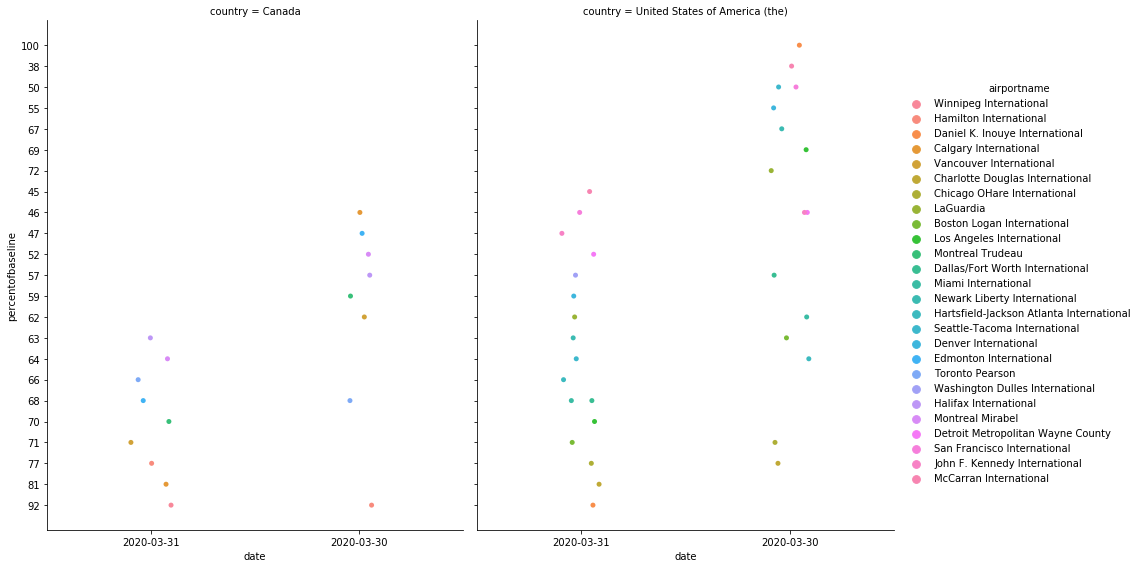

In [36]:
import seaborn as sns
ax = sns.catplot(x="date", y="percentofbaseline", hue="airportname", col="country", data=traffic, 
                 height=8, aspect=.8);

#### World Travel Restrictions

In [ ]:
travel = pd.read_csv('world-travel-restrictions.csv', sep= ',', header= None)

# a summary of the travel restrictions file
travel.head()

In [ ]:
new_header = travel.iloc[0] 
travel = travel[1:]
travel.columns = new_header 
travel.head()

In [ ]:
travel.shape

In [ ]:
travel.describe(include = 'all')

In [ ]:
travel["adm0_name"].value_counts()

In [ ]:
print(travel['info'])

In [ ]:
# text cleaning - remove new lines, tabs, and punctuation
# remove newline and tab tokens
travel['info'] = travel['info'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
travel['info'] = travel['info'].apply(lambda x: x.replace("TAB_TOKEN", " "))

# remove all non-alphanumeric characters but keeping spaces
travel['info'] = travel['info'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)
#travel['info'] = travel['info'].str.replace('  ', '', regex=True)

# change all to lowercase
travel['info'] = travel['info'].apply(lambda x: x.lower())

# print to compare to above
print(travel['info'])